<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Obtaining the Dataset</li>
<li>Handling missing values</li>
<li>Encoding the categorical data</li>

</ul>


The Dataset for this exercise depends on your index number i.e number_of_data_set = index % 10:


0.  https://www.kaggle.com/ruchi798/drug-overdose-deaths
1.  https://www.kaggle.com/rishidamarla/employee-data-from-the-city-of-chicago
2.  https://www.kaggle.com/vikasukani/loan-eligible-dataset
3.  https://www.kaggle.com/tamilsel/healthcare-providers-data
4.  https://www.kaggle.com/chirag9073/europe-economic-crisis
5.  https://www.kaggle.com/bryanb/cac40-stocks-dataset
6.  https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea
7.  https://www.kaggle.com/tsaustin/us-historical-stock-prices-with-earnings-data
8.  https://www.kaggle.com/kimjihoo/coronavirusdataset (Dataset: PatientInfo.csv)
9.  https://www.kaggle.com/mczielinski/bitcoin-historical-data

# <font color = 'Orange'> Read your Dataset (.csv)</font>

In [6]:
#add your code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
dataset = pd.read_csv("/content/drive/MyDrive/V semestar/Voved vo nauka za podatoci/Europe_crisis.csv")
dataset[50:60]


,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
50,50,AUT,Austria,1850.0,0.0,0.0,1.25040878469219e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,-12.57120662868979,1,1,0.0
51,51,AUT,Austria,1851.0,0.0,0.0,1.25515674319116e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,5.954390641196494,1,1,0.0
52,52,AUT,Austria,1852.0,0.0,0.0,1.157242211289e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,9.818171653785402,1,0,0.0
53,53,AUT,Austria,1853.0,0.0,0.0,1.15976153620682e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,19.220881694155988,1,1,0.0
54,54,AUT,Austria,1854.0,0.0,0.0,1.24648445164713e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,50.87266089518461,1,0,1.0
55,55,AUT,Austria,1855.0,0.0,0.0,1.1275432463924e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,-1.3082943546519732,1,0,0.0
56,56,AUT,Austria,1856.0,0.0,0.0,1.06499616045193e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,-18.72498950699838,1,1,0.0
57,57,AUT,Austria,1857.0,0.0,0.0,1.10307672555589e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,-35.47120880671793,1,0,0.0
58,58,AUT,Austria,1858.0,0.0,0.0,1.04203154485488e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,-9.621041251141715,1,0,0.0
59,59,AUT,Austria,1859.0,0.0,0.0,1.22308379904508e-05,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.0,-18.848070354909506,1,1,0.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color = 'Orange'> Target column/columns </font>

Write some info about the target value/values



*write here ..*

The attribute 'Banking crisis' is categorical attribute with domain {0,1}. Conclusion derived by the histogram is strong leading in the dataset for value 0 for this attribute.



Visualize the target column

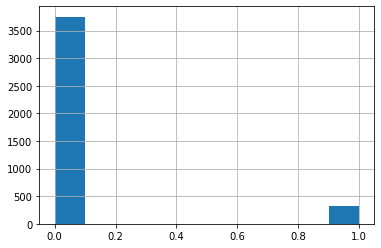

In [7]:
#add your code
dataset['Banking Crisis '].hist()
#dataset['Year'].hist()


# <font color = 'Orange'>Detect the Missing values</font>

Count the percentage of missing values in every column of the Dataset. 

In [8]:
#add your code
dataset.value_counts
missing_values = dataset.isnull().sum()
percentage = missing_values/len(dataset)*100
table = pd.concat([missing_values, percentage],axis=1)
table.columns = ["Number missing values", "Percentage missing values"]
table

,Number missing values,Percentage missing values
Unnamed: 0,0,0.000000
CC3,0,0.000000
Country,0,0.000000
Year,0,0.000000
Banking Crisis,476,10.445469
Systemic Crisis,12,0.263331
exch_usd,825,18.104016
National Currency,435,9.545754
exch_sources,1,0.021944
Domestic Debt,661,14.505157


Visualize the missing values using Missingno library

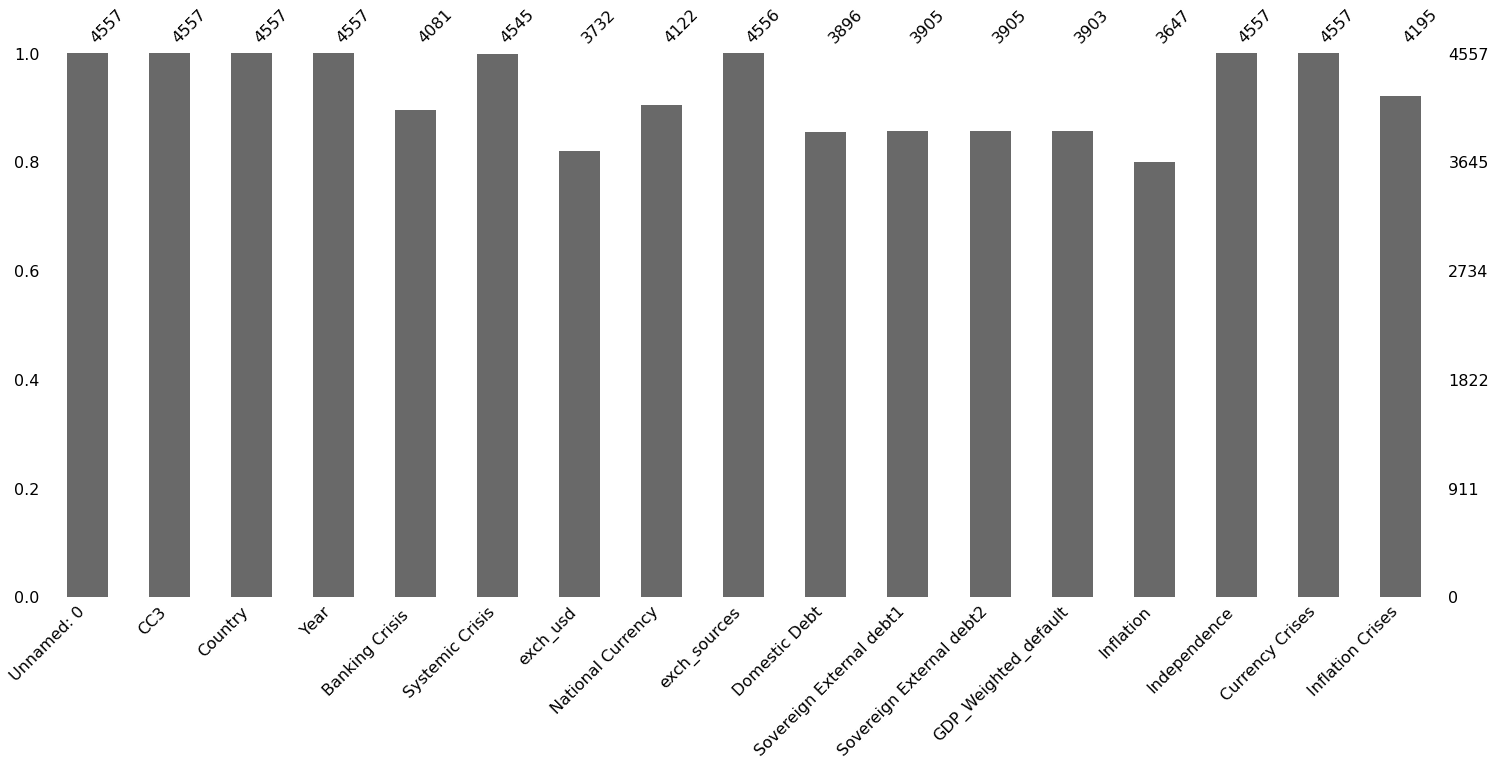

In [10]:
#add your code
import missingno as msno
msno.bar(dataset)

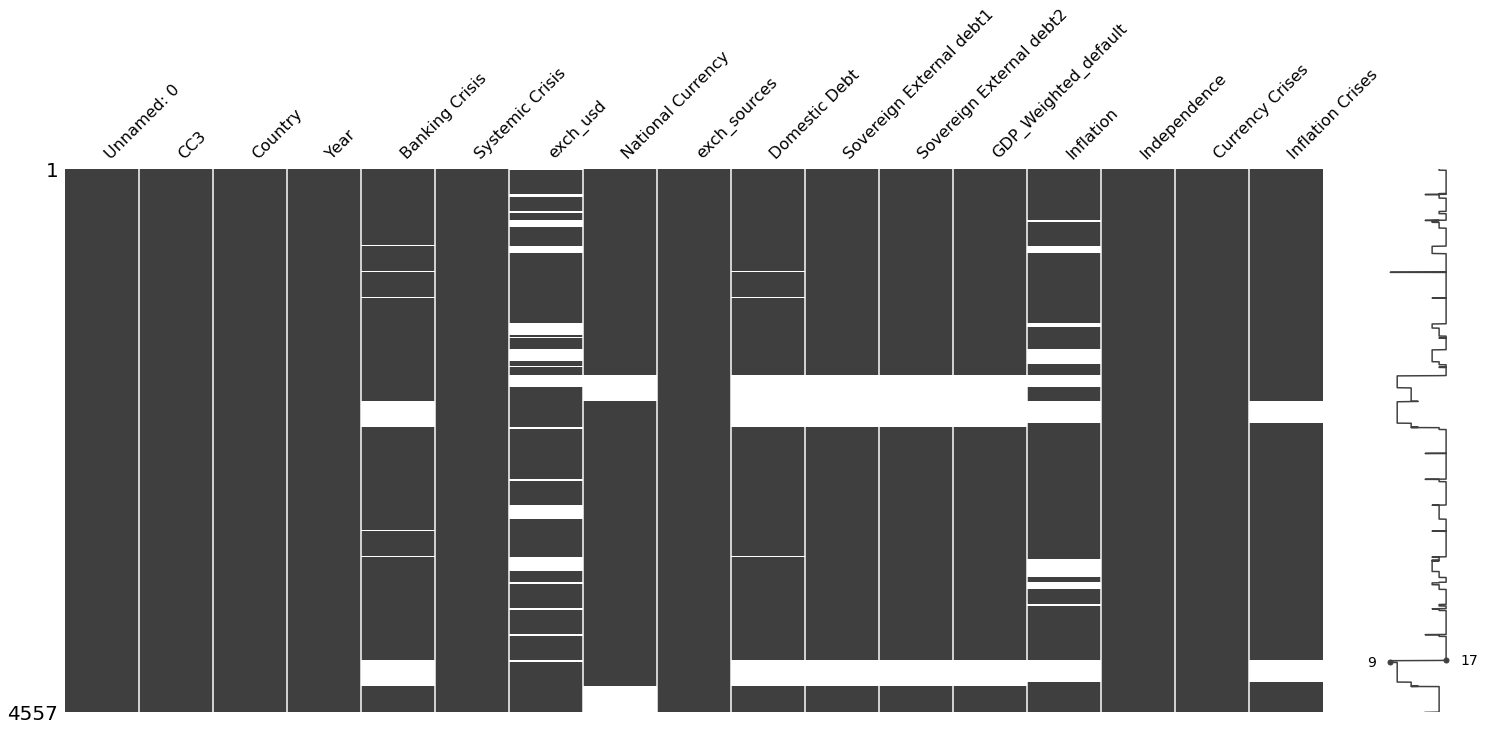

In [11]:
msno.matrix(dataset)

# <font color = 'Orange'> Find reasons for the missing values</font>


With the help of visualization matrix, heatmap, dendrogram, show the dependence between the columns with missing values

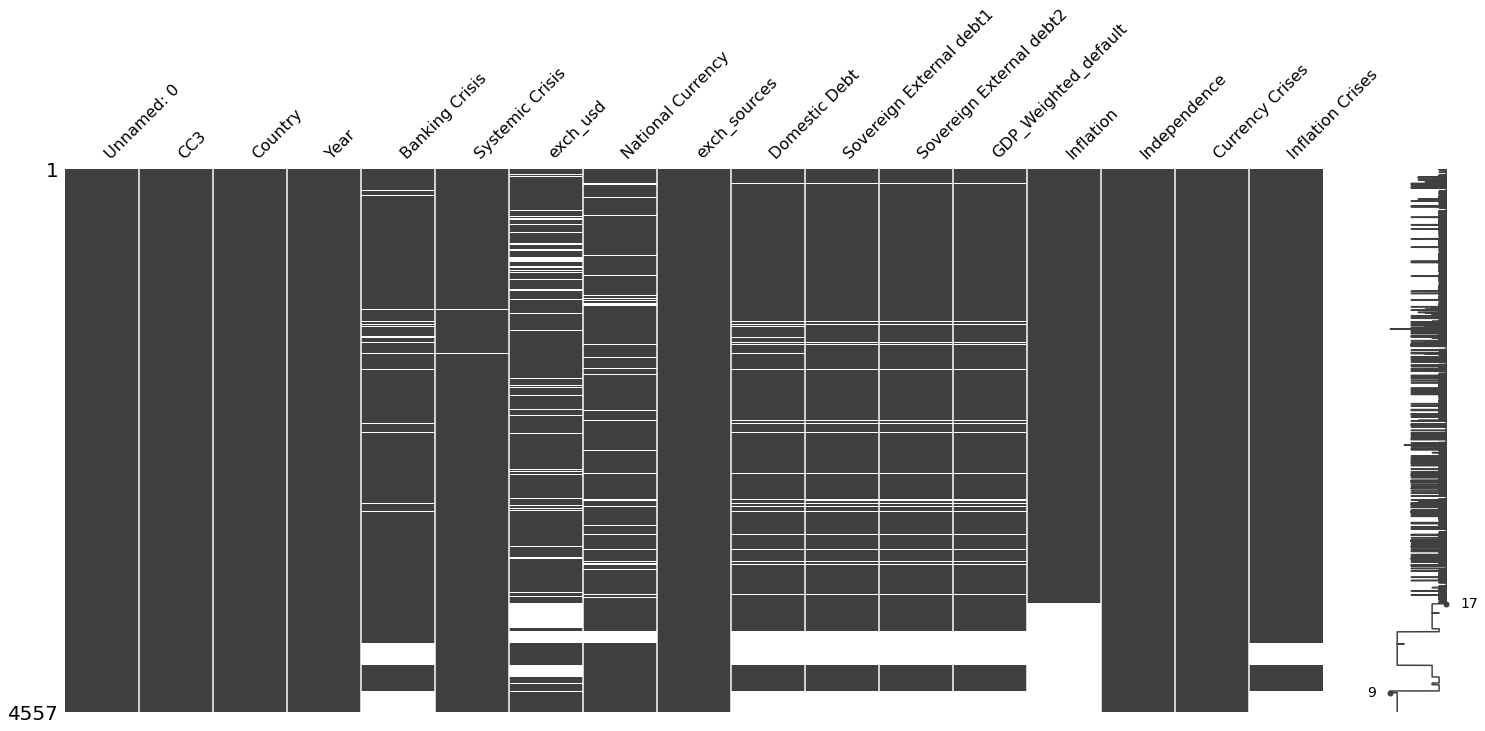

In [16]:
#add your code
msno.matrix(dataset.sort_values('Inflation'))
#when sorted by Inflation, the pattern of missing data is recognizable between the attributes 'Domestic Debt', 'Sovereign External debt1', 'Sovereign External debt2', GDP weighted default.
#Also the attributes Inflation and Inflation Crises are somehow dependable but not too much.

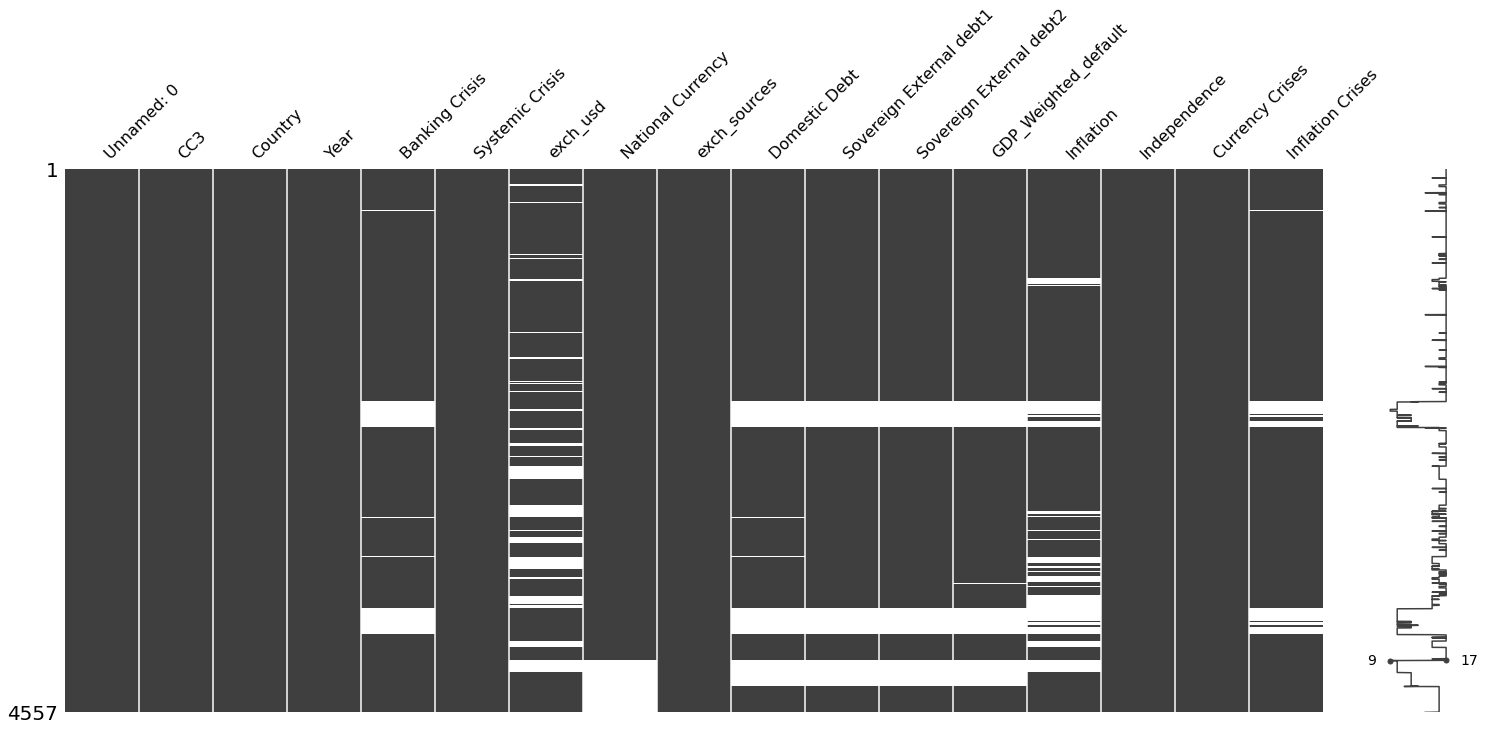

In [19]:
msno.matrix(dataset.sort_values('National Currency'))
#No correlation between National Currency and other attributes

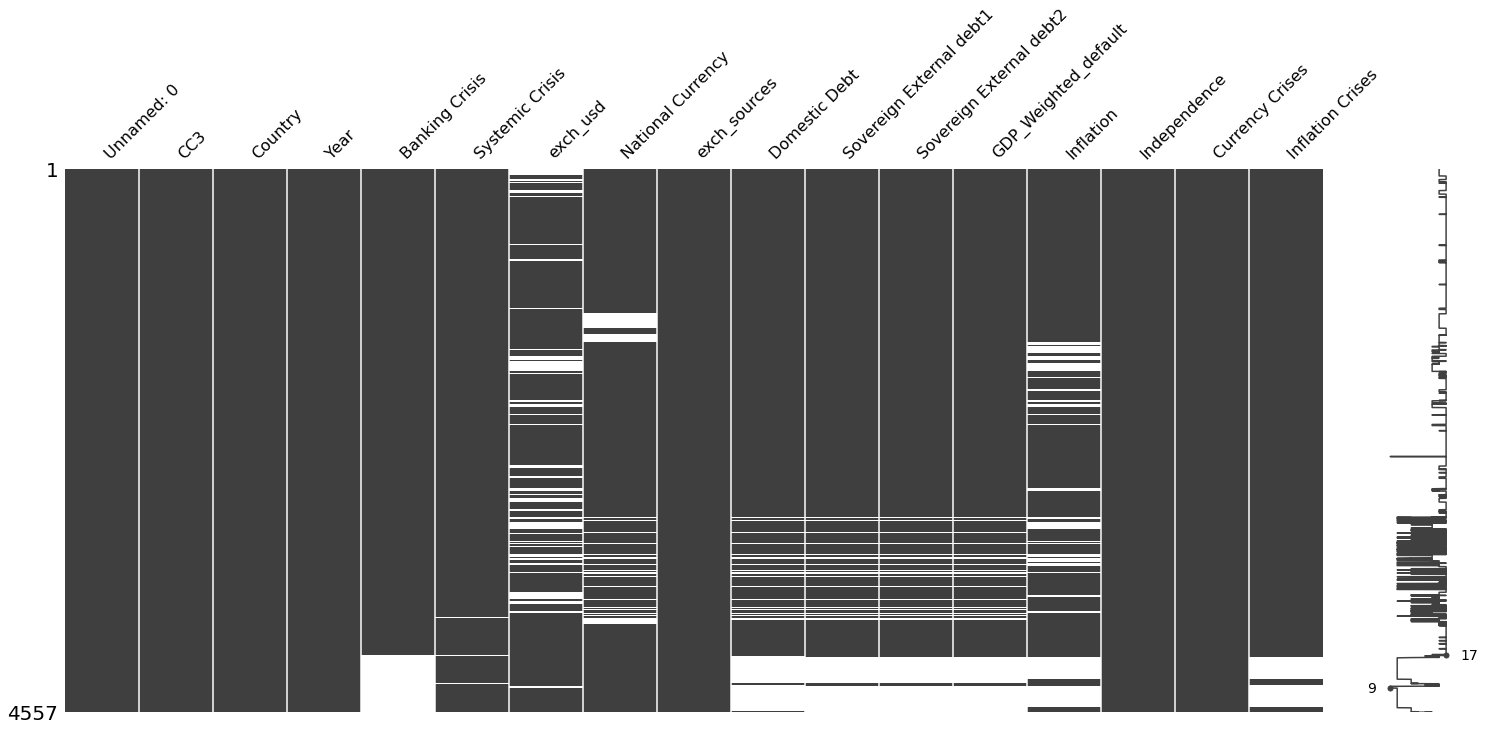

In [25]:
msno.matrix(dataset.sort_values('Banking Crisis '))
#There is some correlation between Banking crisis and the group of strongly correlated attributes from above.

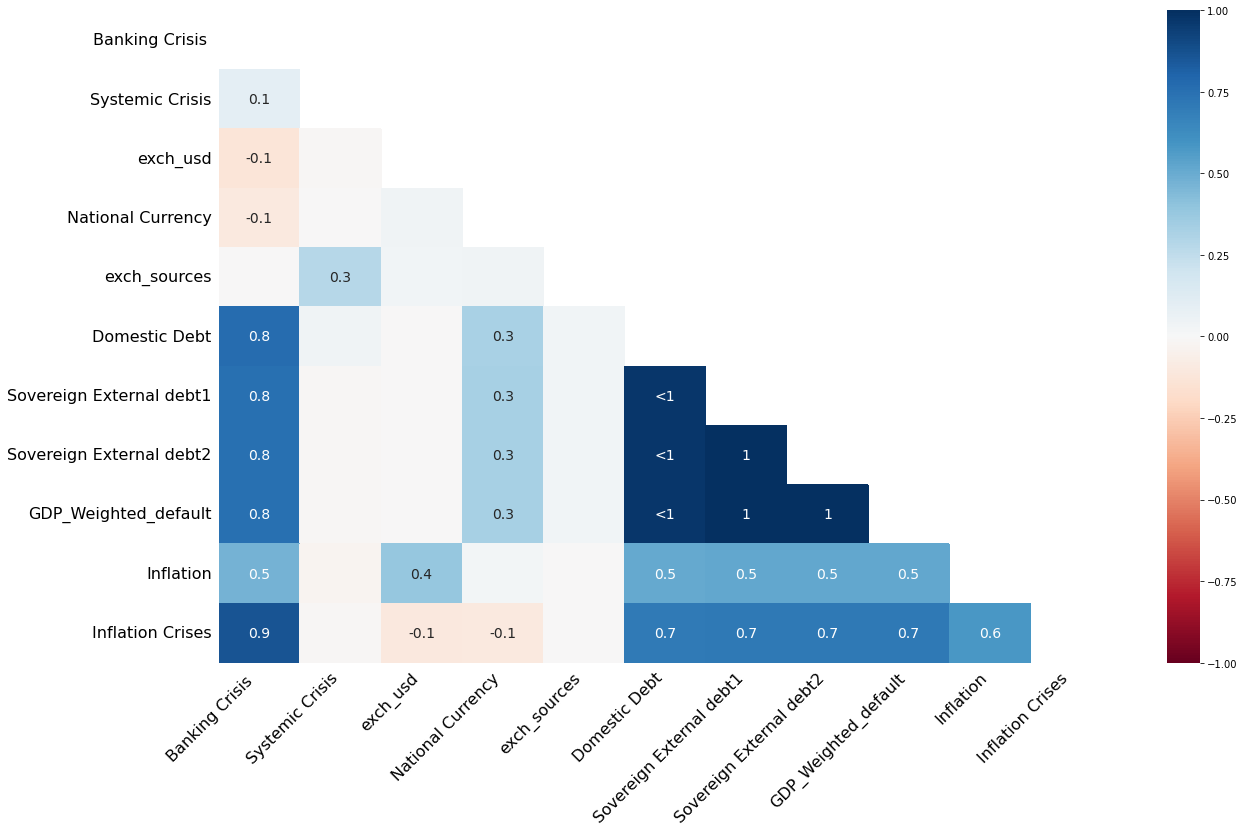

In [20]:
msno.heatmap(dataset)

In [ ]:
msno.dendrogram(dataset)


Write the reasons for the missing values

Conclusion: There is strong correlation between Banking Crisis and inflation, inflation crises, and attributes related with debts which is expected knowing how the banking system works.

# <font color = 'Orange'>Handle the missing values</font>

After you observed the data, the main goal is to know how the columns depend one to another. Therefore, the next step is to select one of the techniques of Machine Learning: Linear Regression, KNN Classification or Logistic Regression that you will use for handling the missing values. You don't need to use the whole dataset for detecting the missing values in one column, you can use a subset of columns that are making the prediction of the target missing value. 


In [33]:
#add your code
dataset.fillna(method='bfill',inplace=True)
dataset.isnull().sum()
dataset

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,AUT,Austria,1800.0,0.0,0.0,6.07011959526076e-06,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,AUT,Austria,1801.0,0.0,0.0,6.07011959526076e-06,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,AUT,Austria,1802.0,0.0,0.0,6.07011959526076e-06,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,AUT,Austria,1803.0,0.0,0.0,6.07011959526076e-06,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,AUT,Austria,1804.0,0.0,0.0,6.07011959526076e-06,"1748-1892-Gulden, 1892-1923-Krone,1923-1998 sc...",Primary source isGFD-RR_IFS official eop; alt1...,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,4552,GBR,United Kingdom,2012.0,1.0,0.0,0.633046988857327,"1798-1803 franc of the Helvetic Republic, 1894...",Primary source is pound/US dollar GBP; alt1 se...,0.0,0,0.0,0.00,2.801,1,0,0.0
4553,4553,GBR,United Kingdom,2013.0,1.0,0.0,0.639660577613477,"1798-1803 franc of the Helvetic Republic, 1894...",Primary source is pound/US dollar GBP; alt1 se...,0.0,0,0.0,0.00,2.568,1,0,0.0
4554,4554,GBR,United Kingdom,2014.0,1.0,0.0,0.607729626878255,"1798-1803 franc of the Helvetic Republic, 1894...",Primary source is pound/US dollar GBP; alt1 se...,0.0,0,0.0,0.00,1.472,1,0,0.0
4555,4555,GBR,United Kingdom,2015.0,1.0,0.0,0.64,"1798-1803 franc of the Helvetic Republic, 1894...",Primary source is pound/US dollar GBP; alt1 se...,0.0,0,0.0,0.00,0.05,1,0,0.0


# <font color = 'Orange'> Encode non numerical values </font>

In [42]:
#add your code
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder() 
dataset['Country']= le.fit_transform(dataset['Country']) 
dataset['CC3']= le.fit_transform(dataset['CC3'])
dataset['National Currency']= le.fit_transform(dataset['National Currency'])
dataset['exch_sources']= le.fit_transform(dataset['exch_sources'])

dataset






,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,0,0,1800.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,0,0,1801.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,0,0,1802.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,0,0,1803.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,0,0,1804.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,4552,8,20,2012.0,1.0,0.0,0.633046988857327,9,16,0.0,0,0.0,0.00,2.801,1,0,0.0
4553,4553,8,20,2013.0,1.0,0.0,0.639660577613477,9,16,0.0,0,0.0,0.00,2.568,1,0,0.0
4554,4554,8,20,2014.0,1.0,0.0,0.607729626878255,9,16,0.0,0,0.0,0.00,1.472,1,0,0.0
4555,4555,8,20,2015.0,1.0,0.0,0.64,9,16,0.0,0,0.0,0.00,0.05,1,0,0.0


# <font color = 'Orange'>Save the new Dataset(.csv) </font>

In [46]:
#add your code
dataset.to_csv('/content/drive/MyDrive/Colab Notebooks/dataset_homework3.csv')


Print the first rows of your final Dataset

In [44]:
#add your code
dataset.head()

,Unnamed: 0,CC3,Country,Year,Banking Crisis,Systemic Crisis,exch_usd,National Currency,exch_sources,Domestic Debt,Sovereign External debt1,Sovereign External debt2,GDP_Weighted_default,Inflation,Independence,Currency Crises,Inflation Crises
0,0,0,0,1800.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,0,0.0,0.00,14.64646464646464,1,1,0.0
1,1,0,0,1801.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,0,0.0,0.00,29.24081323858143,1,1,1.0
2,2,0,0,1802.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,1,1.0,0.86,11.554948079807115,1,0,0.0
3,3,0,0,1803.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,1,1.0,0.86,12.448675361157424,1,0,0.0
4,4,0,0,1804.0,0.0,0.0,6.07011959526076e-06,7,17,0.0,1,1.0,0.86,-3.399989463738562,1,1,0.0
